In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from plotnine import *

In [25]:
entitiesTrain = pd.read_csv('/content/entities_train.csv', sep='\t')  
entitiesTrain.head()

,id,abstract_id,offset_start,offset_finish,type,mention,entity_ids
0,0,1353340,11,39,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
1,1,1353340,111,126,GeneOrGeneProduct,arylsulfatase A,410
2,2,1353340,128,132,GeneOrGeneProduct,ARSA,410
3,3,1353340,159,187,DiseaseOrPhenotypicFeature,metachromatic leukodystrophy,D007966
4,4,1353340,189,192,DiseaseOrPhenotypicFeature,MLD,D007966


In [6]:
entitiesTrain.shape

(13636, 7)

In [7]:
entitiesTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             13636 non-null  int64 
 1   abstract_id    13636 non-null  int64 
 2   offset_start   13636 non-null  int64 
 3   offset_finish  13636 non-null  int64 
 4   type           13636 non-null  object
 5   mention        13636 non-null  object
 6   entity_ids     13636 non-null  object
dtypes: int64(4), object(3)
memory usage: 745.8+ KB


In [44]:
entitiesTrain.isnull().values.any()

False

In [8]:
abstractsTrain = pd.read_csv('/content/abstracts_train.csv', sep='\t')  
abstractsTrain.head()

,abstract_id,title,abstract
0,1353340,Late-onset metachromatic leukodystrophy: molec...,We report on a new allele at the arylsulfatase...
1,1671881,Two distinct mutations at a single BamHI site ...,Classical phenylketonuria is an autosomal rece...
2,1848636,Debrisoquine phenotype and the pharmacokinetic...,The metabolism of the cardioselective beta-blo...
3,2422478,Midline B3 serotonin nerves in rat medulla are...,Previous experiments in this laboratory have s...
4,2491010,Molecular and phenotypic analysis of patients ...,Eighty unrelated individuals with Duchenne mus...


In [9]:
abstractsTrain.shape

(400, 3)

In [10]:
abstractsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   abstract_id  400 non-null    int64 
 1   title        400 non-null    object
 2   abstract     400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [45]:
abstractsTrain.isnull().values.any()

False

In [11]:
relationsTrain = pd.read_csv('/content/relations_train.csv', sep='\t')  
relationsTrain.head()


,id,abstract_id,type,entity_1_id,entity_2_id,novel
0,0,1353340,Association,410,D007966,No
1,1,1353340,Positive_Correlation,rs74315458,D007966,Novel
2,2,1671881,Positive_Correlation,D010661,rs62514952,Novel
3,3,1671881,Positive_Correlation,D010661,rs62514953,Novel
4,4,1671881,Association,5053,D010661,No


In [12]:
relationsTrain.shape

(4280, 6)

In [13]:
relationsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280 entries, 0 to 4279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4280 non-null   int64 
 1   abstract_id  4280 non-null   int64 
 2   type         4280 non-null   object
 3   entity_1_id  4280 non-null   object
 4   entity_2_id  4280 non-null   object
 5   novel        4280 non-null   object
dtypes: int64(2), object(4)
memory usage: 200.8+ KB


In [46]:
relationsTrain.isnull().values.any()

False

###**Correlacion de datos sobre abstracts**

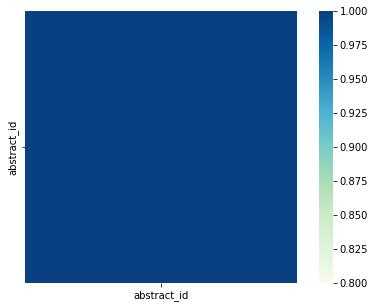

In [41]:
corrmat = abstractsTrain.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='GnBu');

###**Correlacion de datos sobre entities**

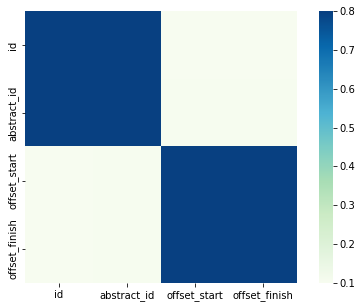

In [42]:
corrmat = entitiesTrain.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='GnBu');

###**Correlacion de datos sobre relations**

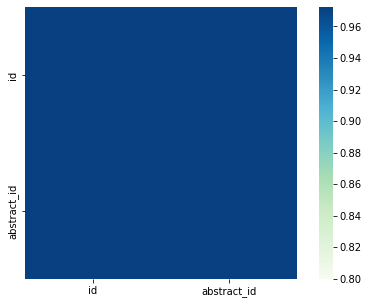

In [43]:
corrmat = relationsTrain.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='GnBu');

###**Tipos de entidades**

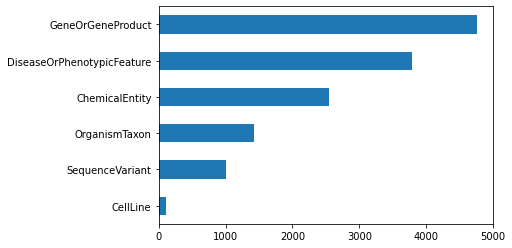

In [14]:
entitiesTrain['type'].value_counts().plot(kind="barh").invert_yaxis();

###**Tipos de relaciones**

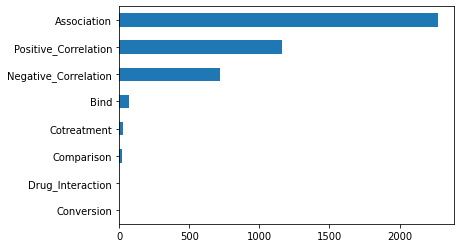

In [28]:
relationsTrain['type'].value_counts().plot(kind="barh").invert_yaxis();

###**Tablas de frecuencia para las variables categóricas**

**Frecuencia para entidades**

In [50]:
(entitiesTrain 
  .groupby("type")
  .agg(frequency=("type", "count")))

,frequency
type,
CellLine,117
ChemicalEntity,2540
DiseaseOrPhenotypicFeature,3784
GeneOrGeneProduct,4764
OrganismTaxon,1420
SequenceVariant,1011


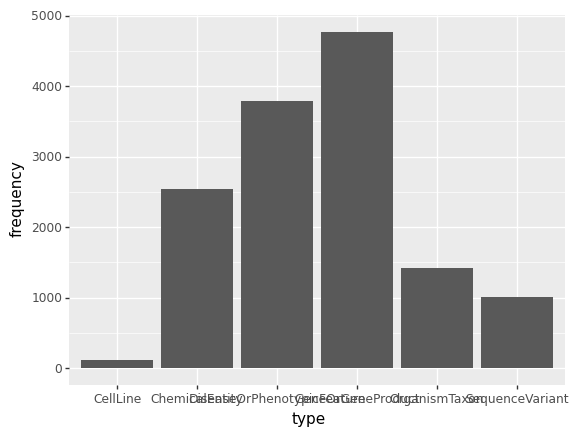

<ggplot: (8763673132717)>

In [55]:
freq_by_type = (entitiesTrain 
  .groupby("type")
  .agg(frequency=("type", "count"))
  .reset_index())
  
(ggplot(freq_by_type, aes(x = "type", y = "frequency")) +
  geom_bar(stat = 'identity'))

**Frecuencia para relaciones**

In [51]:
(relationsTrain
  .groupby("type")
  .agg(frequency=("type", "count")))

,frequency
type,
Association,2274
Bind,69
Comparison,22
Conversion,3
Cotreatment,29
Drug_Interaction,3
Negative_Correlation,721
Positive_Correlation,1159


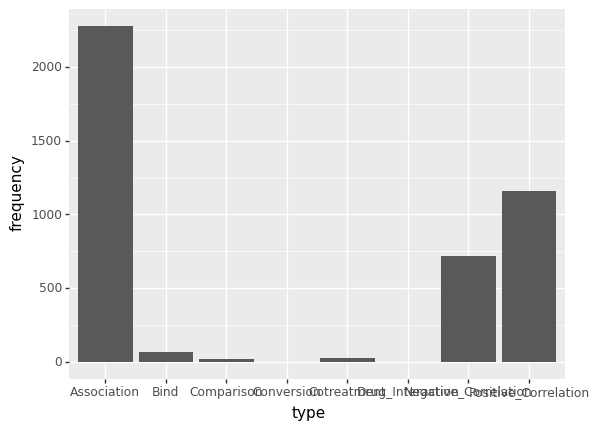

<ggplot: (8763670534261)>

In [56]:
freq_by_type = (relationsTrain
  .groupby("type")
  .agg(frequency=("type", "count"))
  .reset_index())
  
(ggplot(freq_by_type, aes(x = "type", y = "frequency")) +
  geom_bar(stat = 'identity'))